In [1]:
import pandas as pd

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
features = df[['Is Series', 'Hidden Gem Score', 'Runtime', 'Minimum Age', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
target = df['IMDb Score']

# Drop rows with missing values in features or target
features = features.dropna()
target = target[features.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4593873480521237
R-squared: 0.46774998539796264


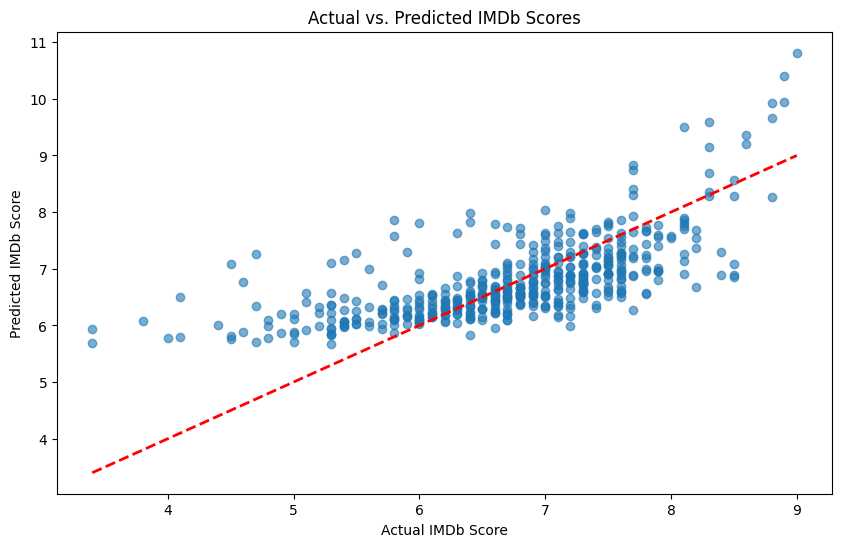

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted IMDb Scores')
plt.show()


In [20]:
# Define the target columns for Metacritic Score and Rotten Tomatoes Score
target_column_mc = 'Metacritic Score'
target_column_rt = 'Rotten Tomatoes Score'

# Separate the features and target variables for Metacritic Score
X_mc = features
y_mc = df[target_column_mc]

# Separate the features and target variables for Rotten Tomatoes Score
X_rt = features
y_rt = df[target_column_rt]

# Split the data into training and testing sets for Metacritic Score
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Rotten Tomatoes Score
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rt, y_rt, test_size=0.2, random_state=42)

# Create and train the regression model for Metacritic Score
model_mc = LinearRegression()
model_mc.fit(X_train_mc, y_train_mc)

# Create and train the regression model for Rotten Tomatoes Score
model_rt = LinearRegression()
model_rt.fit(X_train_rt, y_train_rt)

# Make predictions on the test set for Metacritic Score
y_pred_mc = model_mc.predict(X_test_mc)

# Make predictions on the test set for Rotten Tomatoes Score
y_pred_rt = model_rt.predict(X_test_rt)

# Evaluate the model for Metacritic Score
mse_mc = mean_squared_error(y_test_mc, y_pred_mc)
r2_mc = r2_score(y_test_mc, y_pred_mc)

# Evaluate the model for Rotten Tomatoes Score
mse_rt = mean_squared_error(y_test_rt, y_pred_rt)
r2_rt = r2_score(y_test_rt, y_pred_rt)

# Print evaluation metrics for Metacritic Score
print(f'Mean Squared Error (Metacritic Score): {mse_mc:.3f}')
print(f'R-squared (Metacritic Score): {r2_mc:.3f}')

# Print evaluation metrics for Rotten Tomatoes Score
print(f'Mean Squared Error (Rotten Tomatoes Score): {mse_rt:.3f}')
print(f'R-squared (Rotten Tomatoes Score): {r2_rt:.3f}')

# Compare the evaluation metrics for all three models
print("\nComparison of Evaluation Metrics:")
print(f'IMDb Score - Mean Squared Error: {mse:.3f}, R-squared: {r2:.3f}')
print(f'Metacritic Score - Mean Squared Error: {mse_mc:.3f}, R-squared: {r2_mc:.3f}')
print(f'Rotten Tomatoes Score - Mean Squared Error: {mse_rt:.3f}, R-squared: {r2_rt:.3f}')

Mean Squared Error (Metacritic Score): 133.196
R-squared (Metacritic Score): 0.560
Mean Squared Error (Rotten Tomatoes Score): 304.420
R-squared (Rotten Tomatoes Score): 0.564

Comparison of Evaluation Metrics:
IMDb Score - Mean Squared Error: 0.459, R-squared: 0.468
Metacritic Score - Mean Squared Error: 133.196, R-squared: 0.560
Rotten Tomatoes Score - Mean Squared Error: 304.420, R-squared: 0.564
